<a href="https://colab.research.google.com/github/TomasRGodoy-Git/Tensorflow/blob/master/MNIST_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist_dataset = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

In [3]:
#Explore the data
train_images.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

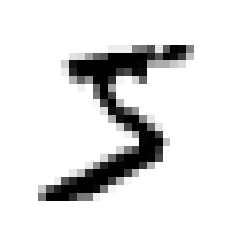

5

In [12]:
first_digit = train_images[0]
first_digit_image = first_digit.reshape(28,28)

plt.imshow(first_digit_image,cmap="binary")
plt.axis('off')
plt.show()

train_labels[0]

In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0

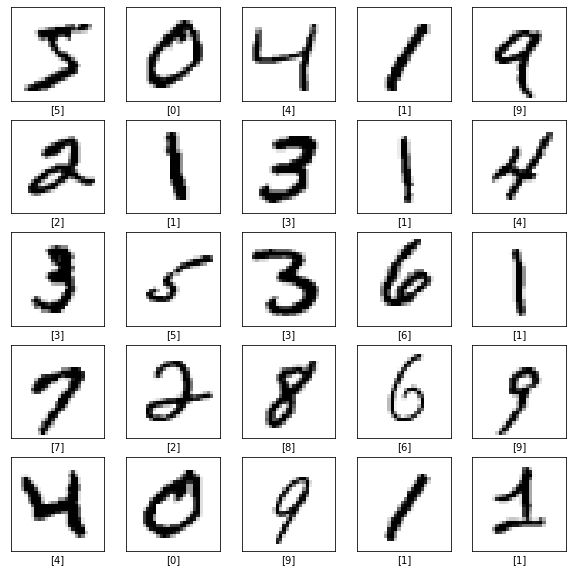

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel([train_labels[i]])
plt.show()

In [22]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)), #define the input data 28x28 pixels
                          keras.layers.Dense(128, activation='relu'), #define the model structure
                          keras.layers.Dense(10) #define the output as 10 digits
])

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model.fit(train_images, train_labels,epochs=10,verbose=1)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0465 - accuracy: 0.9855
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0373 - accuracy: 0.9882
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0294 - accuracy: 0.9911
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0239 - accuracy: 0.9925
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0202 - accuracy: 0.9936
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0168 - accuracy: 0.9944
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0137 - accuracy: 0.9959
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0117 - accuracy: 0.9964
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0102 - accuracy: 0.9968
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.008

In [26]:
test_loss , test_acc = model.evaluate(test_images,test_labels,verbose=2)
print('\nTest accuracy:',test_acc)

313/313 - 0s - loss: 0.0928 - accuracy: 0.9780

Test accuracy: 0.9779999852180481


Make Predictions


In [27]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [28]:
predictions = probability_model.predict(test_images)

In [29]:
predictions[0]

array([1.3033639e-10, 3.0376613e-15, 7.0474546e-09, 4.3269900e-08,
       5.9421791e-19, 2.5630515e-11, 1.1427925e-18, 1.0000000e+00,
       4.0023211e-09, 3.5033532e-09], dtype=float32)

In [30]:
np.argmax(predictions[0])

7

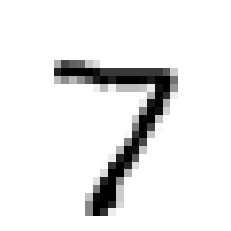

7

In [31]:
first_digit = test_images[0]
first_digit_image = first_digit.reshape(28,28)

plt.imshow(first_digit_image,cmap="binary")
plt.axis('off')
plt.show()

test_labels[0]

#the prediction for the first value on the dataset is right

In [38]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format([predicted_label],
                                100*np.max(predictions_array),
                                [true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

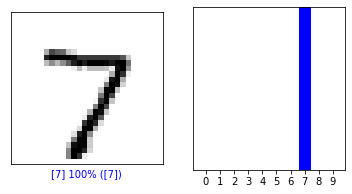

In [39]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

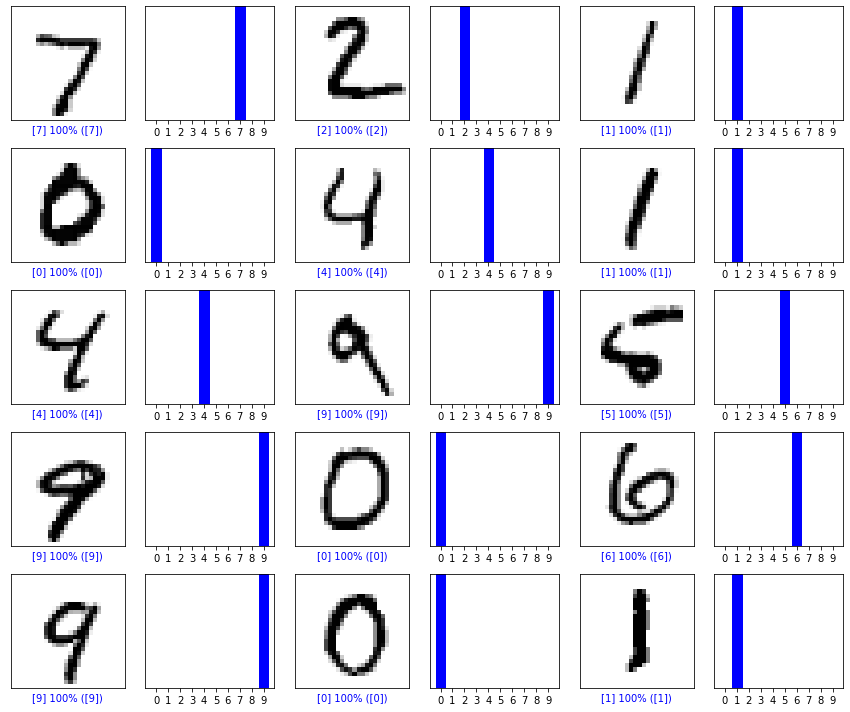

In [41]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()